In [1]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [2]:
 # Set path to CSV and read in CSV
csv_path = Path("DATA/ETH/ETH_DATA.csv")
eth_df=pd.read_csv(csv_path)

In [3]:
 # Set index as Date
eth_df = eth_df.set_index(pd.to_datetime(eth_df["Date"], infer_datetime_format=True))

# Display sample data
eth_df.head(10)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,,
2015-08-09,ETH,2015-08-09,0.909046,1.749289,1.916540,0.794497
2015-08-10,ETH,2015-08-10,0.692321,0.909046,0.909046,0.692321
2015-08-11,ETH,2015-08-11,0.668067,0.692321,0.692321,0.654331
2015-08-12,ETH,2015-08-12,0.850151,0.668067,1.148621,0.668067
2015-08-13,ETH,2015-08-13,1.266023,0.850151,1.266023,0.850151
2015-08-14,ETH,2015-08-14,1.951460,1.266023,2.073329,1.149458
2015-08-15,ETH,2015-08-15,1.591219,1.951460,2.225695,1.591219
2015-08-16,ETH,2015-08-16,1.693707,1.591219,1.768860,1.591219
2015-08-17,ETH,2015-08-17,1.423244,1.693707,1.693707,1.099489


In [4]:
#check for na
eth_df.isnull().values.any()

False

In [428]:
#check main_df to see if everything is correct 
eth_df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,,
2015-08-09,ETH,2015-08-09,0.909046,1.749289,1.916540,0.794497
2015-08-10,ETH,2015-08-10,0.692321,0.909046,0.909046,0.692321
2015-08-11,ETH,2015-08-11,0.668067,0.692321,0.692321,0.654331
2015-08-12,ETH,2015-08-12,0.850151,0.668067,1.148621,0.668067
2015-08-13,ETH,2015-08-13,1.266023,0.850151,1.266023,0.850151


In [429]:
# Set the random seed to (2)
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [430]:
#create function to amke x and y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [431]:
# Define the window size
window_size = 9

# Set the index of the feature and target columns
feature_column = 2
target_column = 2

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(eth_df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[0.909046 0.692321 0.668067 0.850151 1.266023 1.95146  1.591219 1.693707
  1.423244]
 [0.692321 0.668067 0.850151 1.266023 1.95146  1.591219 1.693707 1.423244
  1.199595]
 [0.668067 0.850151 1.266023 1.95146  1.591219 1.693707 1.423244 1.199595
  1.182837]] 

y sample values:
[[1.199595]
 [1.182837]
 [1.279549]]


In [432]:
 # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [433]:
 # Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [434]:
 # Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[1.16315033e-04]
  [6.38688232e-05]
  [5.79994940e-05]
  [1.02062780e-04]
  [2.02701423e-04]
  [3.68573253e-04]
  [2.81396994e-04]
  [3.06198503e-04]
  [2.40748005e-04]]

 [[6.38688232e-05]
  [5.79994940e-05]
  [1.02062780e-04]
  [2.02701423e-04]
  [3.68573253e-04]
  [2.81396994e-04]
  [3.06198503e-04]
  [2.40748005e-04]
  [1.86626227e-04]]

 [[5.79994940e-05]
  [1.02062780e-04]
  [2.02701423e-04]
  [3.68573253e-04]
  [2.81396994e-04]
  [3.06198503e-04]
  [2.40748005e-04]
  [1.86626227e-04]
  [1.82570887e-04]]] 

X_test sample values:
[[[0.04090703]
  [0.04379478]
  [0.04364628]
  [0.04663782]
  [0.0464072 ]
  [0.04369936]
  [0.0436468 ]
  [0.04382717]
  [0.04493723]]

 [[0.04379478]
  [0.04364628]
  [0.04663782]
  [0.0464072 ]
  [0.04369936]
  [0.0436468 ]
  [0.04382717]
  [0.04493723]
  [0.04359566]]

 [[0.04364628]
  [0.04663782]
  [0.0464072 ]
  [0.04369936]
  [0.0436468 ]
  [0.04382717]
  [0.04493723]
  [0.04359566]
  [0.04218582]]]


In [16]:
 # Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [436]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 9
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [437]:
 # Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [438]:
# Show the model summary
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 9, 9)              396       
_________________________________________________________________
dropout_54 (Dropout)         (None, 9, 9)              0         
_________________________________________________________________
lstm_55 (LSTM)               (None, 9, 9)              684       
_________________________________________________________________
dropout_55 (Dropout)         (None, 9, 9)              0         
_________________________________________________________________
lstm_56 (LSTM)               (None, 9)                 684       
_________________________________________________________________
dropout_56 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)               

In [439]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

Epoch 1/10
17/17 [==============================] - 5s 10ms/step - loss: 0.0034
Epoch 2/10
17/17 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 3/10
17/17 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 4/10
17/17 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 5/10
17/17 [==============================] - 0s 10ms/step - loss: 0.0018
Epoch 6/10
17/17 [==============================] - 0s 10ms/step - loss: 0.0013
Epoch 7/10
17/17 [==============================] - 0s 10ms/step - loss: 6.5026e-04
Epoch 8/10
17/17 [==============================] - 0s 10ms/step - loss: 5.0605e-04
Epoch 9/10
17/17 [==============================] - 0s 12ms/step - loss: 4.4086e-04: 0s - loss: 5.7382e-
Epoch 10/10
17/17 [==============================] - 0s 15ms/step - loss: 4.8852e-04


In [440]:
 # Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.002731719985604286

In [441]:
 # Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [442]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [443]:
 # Create a DataFrame of Real and Predicted values
eth_eval = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = eth_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
eth_eval.head()

,Actual,Predicted
Date,,
2019-10-15,180.580000,197.040695
2019-10-16,174.754083,199.505341
2019-10-17,176.390105,199.829056
2019-10-18,173.750089,200.050232
2019-10-19,171.158513,197.904816


<AxesSubplot:title={'center':'Actual Vs. Predicted ETH Prices'}, xlabel='Date'>

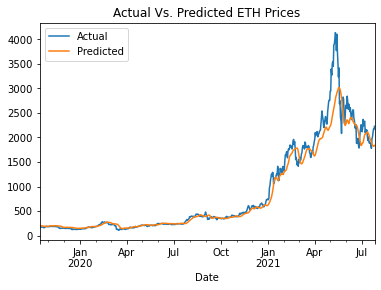

In [444]:
 # Plot the real vs predicted prices as a line chart
eth_eval.plot(title="Actual Vs. Predicted ETH Prices")

In [464]:
#seprate actual and pred
Pred= eth_eval['Actual']
act= eth_eval['Predicted']

#model eval
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(act, Pred))
print(math.sqrt(mean_squared_error(act, Pred)))
print(mean_absolute_error(act, Pred))

46647.24108071358
215.97972377219483
102.59572350824543


In [465]:
#RANDOM FOREST

In [17]:
#assign atributes to names
#future period desides how many days ahead data will be 
FUTURE_PERIOD_PREDICT = 3

In [18]:
#create buy and sell signals 
#def classification 

def classify(predicted, future):
    if future > predicted:
        return 1
    else:
        return 0

In [19]:
#set data 3 days back to compensate for lag
def add_future_column(eth_df):
    main_df= eth_df.copy()
    main_df['future'] = eth_df["Closing Price (USD)"].shift(-FUTURE_PERIOD_PREDICT)
    
    main_df.dropna(inplace=True)

    main_df.head()
    
    return main_df

In [20]:
#run df thorugh the function to add future coulumn to eth_eval
main_df = add_future_column(eth_df)
main_df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),future
Date,,,,,,,
2015-08-09,ETH,2015-08-09,0.909046,1.749289,1.916540,0.794497,0.850151
2015-08-10,ETH,2015-08-10,0.692321,0.909046,0.909046,0.692321,1.266023
2015-08-11,ETH,2015-08-11,0.668067,0.692321,0.692321,0.654331,1.951460
2015-08-12,ETH,2015-08-12,0.850151,0.668067,1.148621,0.668067,1.591219
2015-08-13,ETH,2015-08-13,1.266023,0.850151,1.266023,0.850151,1.693707


In [21]:
#reshape
def expand_windowed_data(X1,length_of_sample):
    """LSTM is expecting a 3-D data structure with (batch number, time steps, features)"""
    X2 = create_rolling_windows(X1, length_of_sample)
    X3 = X2.reshape(-1, length_of_sample, X1.shape[1])
    return X3 

In [22]:
def create_rolling_windows(values, count):
    """create a set of records that have the first count rows, then the same number of rows offset by one etc.
    example=abcdefghijklmn
    create_rolling_window(example, 3)
    would return abcbcdcdedefefgfghghihijijkjklklmlmn"""
    firstitem = values[:count]
    items = [values[window_start:window_start + count] for window_start in range(1, 1 + len(values) - count)]
    total = np.append(firstitem, items)
    return total

In [23]:
X1= main_df[["Closing Price (USD)"]].to_numpy()
y1 = main_df[["future"]].to_numpy()

In [24]:
X2 = expand_windowed_data(X1,9)
y2 = expand_windowed_data(y1,9)

In [25]:
print(X1.shape,y1.shape)
print(X2.shape,y2.shape)

(2176, 1) (2176, 1)
(2168, 9, 1) (2168, 9, 1)


In [26]:
def create_model(shape):
    model = Sequential()
    model.add(LSTM(16, input_shape=shape, return_sequences=True))
    model.add(LSTM(16, return_sequences=True))
    model.add(Dense(2))
    return model  

In [34]:

model = create_model(X2.shape[1:3]) #The last two entries in the shape, data has shape (batches, timesteps, features)
model.compile(optimizer = "adam", loss="mse")
model.fit(X2, y2, epochs=1000)

Epoch 1/1000
68/68 [==============================] - 3s 5ms/step - loss: 535900.8125
Epoch 2/1000
68/68 [==============================] - 0s 5ms/step - loss: 533987.2500
Epoch 3/1000
68/68 [==============================] - 0s 5ms/step - loss: 532277.3750
Epoch 4/1000
68/68 [==============================] - 0s 5ms/step - loss: 531080.1875
Epoch 5/1000
68/68 [==============================] - 0s 5ms/step - loss: 530038.7500
Epoch 6/1000
68/68 [==============================] - 0s 5ms/step - loss: 529058.3125
Epoch 7/1000
68/68 [==============================] - 0s 5ms/step - loss: 528119.6875
Epoch 8/1000
68/68 [==============================] - 0s 5ms/step - loss: 527210.9375
Epoch 9/1000
68/68 [==============================] - 0s 5ms/step - loss: 526314.5625
Epoch 10/1000
68/68 [==============================] - 0s 5ms/step - loss: 525431.4375
Epoch 11/1000
68/68 [==============================] - 0s 5ms/step - loss: 524560.5625
Epoch 12/1000
68/68 [==============================]

In [35]:
predictions = model.predict(X2[-1].reshape((1,9,1)))


In [36]:
predictions

array([[[ 790.6932 ,  790.4229 ],
        [ 985.03406,  984.7013 ],
        [1014.81537, 1014.473  ],
        [1018.9266 , 1018.58276],
        [1019.4861 , 1019.142  ],
        [1019.56213, 1019.218  ],
        [1019.5724 , 1019.22833],
        [1019.5738 , 1019.2298 ],
        [1019.574  , 1019.23   ]]], dtype=float32)

In [37]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y2.reshape(-1, 1))


NameError: name 'scaler' is not defined

NameError: name 'X_test' is not defined

In [30]:
#add signals column 
#main_df['target'] = classify(main_df["Predicted"], main_df["future"]) 
main_df['target'] = main_df["Predicted"] - main_df["future"]
main_df.head()

KeyError: 'Predicted'

In [ ]:
#ef make_target(main_df):
#   for val in main_df['target']:
 #      if val >= 0: 
 #      val = 1
 #      else: val=0

In [ ]:
main_df['buy_signal'] = main_df

In [ ]:
main_df.info()

In [ ]:
main_df.head()

In [31]:
for val, i in main_df['target']:
    print(val)
    print(i)

KeyError: 'target'